Data Analyzing

- How many rows and columns?
- What is the correlation between the variables and the price? (Why might that be?)
- How are variables correlated to each other? (Why?)
- Which variables have the greatest influence on the price?
- Which variables have the least influence on the price?
- How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

## rows and columns

- raw:(118714, 32)
- cleaned:(111300, 35)
- forsale: (96146, 30)
- forrent:(12274, 30)

### What is the correlation between the variables and the price? (Why might that be?) 
(see datavis notebook)
### How are variables correlated to each other? (Why?) 
(see datavis notebook)

### Which variables have the greatest influence on the price?
- District
- Living Area
- Bedroom and Bathroom 
- PEB
- Kitchen

### Which variables have the least influence on the price?
- Terrace
- Pool
- GardenArea
- ShowerCount
- Facades

## How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

### Qualitative Variables:
1. Url - deleted - irrelavant
2. Country - deleted - same
3. District
4. Fireplace - deleted - more than 90% missing data
5. FloodingZone - deleted - data either null or 0
6. Furnished - deleted for forrent - all is not furnished
7. Garden - ignored 
8. Kitchen - ranked - from 1 to 4 as not/semi/full/hyper installed
9. Locality 
10. PEB - ranked - from 1 as G to 9 as A++
11. PostalCode 
12. PropertyId - irrelevant
13. Province - bar graph
14. Region - bar graph
15. StateOfBuilding - ranked - from 3 to 6 as need restoring, good, renovated and as news 
16. SubtypeOfProperty 
17. SwimmingPool - 1/0
18. Terrace - 1/0
19. TypeOfProperty - deleted 
20. TypeOfSale - dataset splitted into 2 parts as for sale and for rent to further analyse

**Total:** 20

### Quantitative Variables:
1. BathroomCount
2. BedroomCount
3. ConstructionYear
4. GardenArea
5. LivingArea
6. MonthlyCharges
7. NumberOfFacades
8. Price
9. RoomCount
10. ShowerCount
11. SurfaceOfPlot
12. ToiletCount

**Total:** 12

- Plot the outliers.

- Which variables would you delete and why ?
see above
- Represent the number of properties according to their surface using a histogram.
see (cleaning notebook)
- In your opinion, which 5 variables are the most important and why?
-Price, District, PEB, Living Area, 

- What are the **most** expensive municipalities in Belgium? (Average price, median price, price per square meter)
- What are the **most** expensive municipalities in Wallonia? (Average price, median price, price per square meter)
- What are the **most** expensive municipalities in Flanders? (Average price, median price, price per square meter)
- What are the **less** expensive municipalities in Belgium? (Average price, median price, price per square meter)
- What are the **less** expensive municipalities in Wallonia? (Average price, median price, price per square meter)
- What are the **less** expensive municipalities in Flanders? (Average price, median price, price per square meter)
(see datavis)

Import libraries and establish df for sales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder


df_sales = pd.read_csv('df_cleaned_sale.csv')
df_rent = pd.read_csv('df_cleaned_rent.csv')
df = pd.read_csv('DF_cleaned.csv')

df



#need to do smaller df for the analyzes in the next steps




,Unnamed: 0,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,...,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale,Condition_Rank,PEB_Rank,Kitchen_Rank
0,2,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Belgium,Brugge,0,NON_FLOOD_ZONE,0,...,flat_studio,333,0,1,1,2,residential_sale,4,6,3
1,8,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Belgium,Brugge,0,NON_FLOOD_ZONE,1,...,house,0,0,0,2,1,residential_sale,4,6,3
2,10,https://www.immoweb.be/en/classified/house/for...,1,4,2002,Belgium,Veurne,0,NON_FLOOD_ZONE,0,...,house,170,0,1,2,1,residential_sale,3,2,3
3,11,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Belgium,Hasselt,0,NON_FLOOD_ZONE,0,...,apartment,333,0,1,1,2,residential_sale,6,6,3
4,14,https://www.immoweb.be/en/classified/apartment...,1,1,1994,Belgium,Brussels,0,NON_FLOOD_ZONE,1,...,apartment,333,0,1,1,2,residential_sale,6,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111295,181788,https://www.immoweb.be/en/classified/house/for...,1,3,2024,Belgium,Gent,0,NON_FLOOD_ZONE,0,...,house,234,0,0,0,1,residential_sale,4,6,3
111296,181789,https://www.immoweb.be/en/classified/house/for...,4,4,2002,Belgium,Antwerp,0,NON_FLOOD_ZONE,0,...,apartment_block,202,0,0,1,1,residential_sale,5,5,3
111297,181790,https://www.immoweb.be/en/classified/apartment...,1,2,2002,Belgium,Antwerp,0,NON_FLOOD_ZONE,0,...,apartment,333,0,1,1,2,residential_sale,4,4,4
111298,181791,https://www.immoweb.be/en/classified/apartment...,1,2,2002,Belgium,Brugge,0,POSSIBLE_FLOOD_ZONE,0,...,apartment,333,0,1,1,2,residential_sale,4,4,3


In [3]:
df_sales.columns


Index(['BathroomCount', 'BedroomCount', 'ConstructionYear', 'District',
       'Fireplace', 'Furnished', 'Garden', 'GardenArea', 'Kitchen',
       'LivingArea', 'Locality', 'NumberOfFacades', 'PEB', 'PostalCode',
       'Price', 'PropertyId', 'Province', 'Region', 'RoomCount', 'ShowerCount',
       'StateOfBuilding', 'SubtypeOfProperty', 'SurfaceOfPlot', 'SwimmingPool',
       'Terrace', 'ToiletCount', 'TypeOfSale', 'Condition_Rank', 'PEB_Rank',
       'Kitchen_Rank'],
      dtype='object')

Lets show distrutions of (Price)(LivingArea)(ConstructionYear)

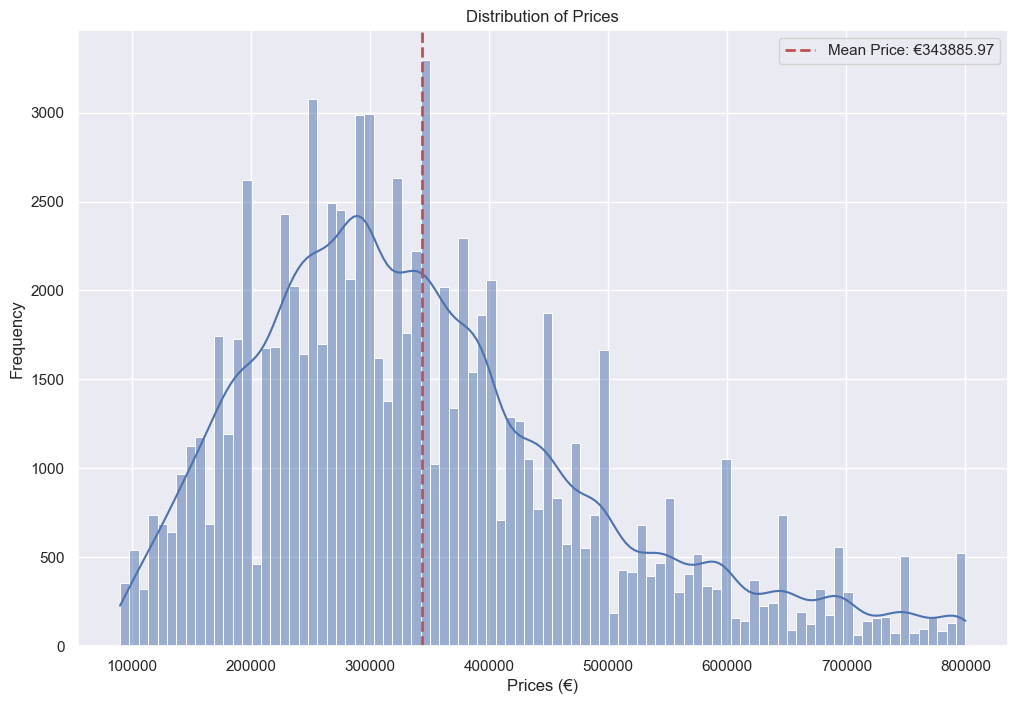

In [4]:

import seaborn as sns
df_average_price = df['Price'].mean()
df['Price'] < 800000

df_filtered = df_sales[df_sales['Price'] < 800000]

df_average_price = df_filtered['Price'].mean()
sns.set_theme()
plt.figure(figsize=(12, 8))
sns.histplot(df_filtered['Price'], kde=True) 
plt.title('Distribution of Prices')
plt.xlabel('Prices (€)')
plt.ylabel('Frequency')
plt.axvline(df_average_price, color='r', linestyle='--', linewidth=2, label=f'Mean Price: €{df_average_price:.2f}')  
plt.legend()
plt.show()


Living area distribution

C:\Users\pieta\AppData\Local\Temp\ipykernel_18928\920301365.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_filtered['LivingArea'], kde=True, bins=30, palette='Blues_d')


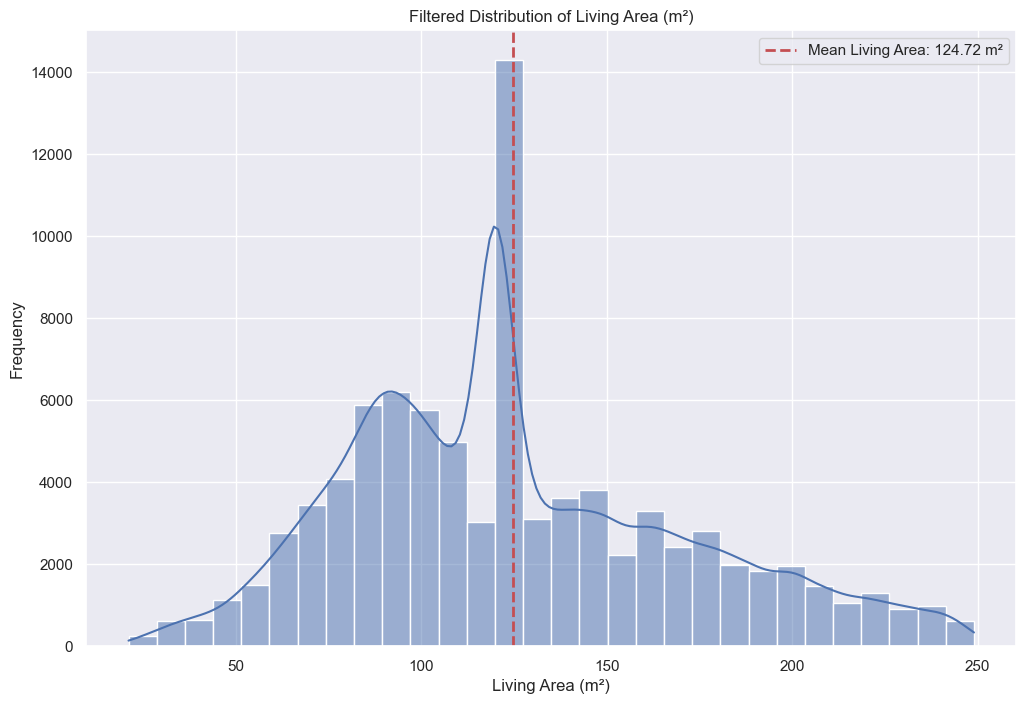

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_filtered = df_sales[(df_sales['LivingArea'] < 250) & (df_sales['LivingArea'] > 20)]  

df_average_Area = df_filtered['LivingArea'].mean()

plt.figure(figsize=(12, 8))
sns.histplot(df_filtered['LivingArea'], kde=True, bins=30, palette='Blues_d')
plt.title('Filtered Distribution of Living Area (m²)')
plt.xlabel('Living Area (m²)')
plt.ylabel('Frequency')
plt.axvline(df_average_Area, color='r', linestyle='--', linewidth=2, label=f'Mean Living Area: {df_average_Area:.2f} m²')
plt.legend()
plt.show()







In [6]:
df_sales.head()

,BathroomCount,BedroomCount,ConstructionYear,District,Fireplace,Furnished,Garden,GardenArea,Kitchen,LivingArea,...,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfSale,Condition_Rank,PEB_Rank,Kitchen_Rank
0,1,1,1969,Brugge,0,0,0,127,INSTALLED,29,...,GOOD,flat_studio,333,0,1,1,residential_sale,4,6,3
1,2,4,2008,Brugge,0,1,0,127,INSTALLED,111,...,GOOD,house,0,0,0,2,residential_sale,4,6,3
2,1,4,2002,Veurne,0,0,1,1,INSTALLED,120,...,TO_BE_DONE_UP,house,170,0,1,2,residential_sale,3,2,3
3,0,2,1972,Hasselt,0,0,0,127,INSTALLED,92,...,AS_NEW,apartment,333,0,1,1,residential_sale,6,6,3
4,1,1,1994,Brussels,0,1,0,127,HYPER_EQUIPPED,50,...,AS_NEW,apartment,333,0,1,1,residential_sale,6,3,4


Year of construction distribution 

C:\Users\pieta\AppData\Local\Temp\ipykernel_18928\2818519304.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_contruct_year['Decade'] = (df_price_contruct_year['ConstructionYear'] // 10) * 10


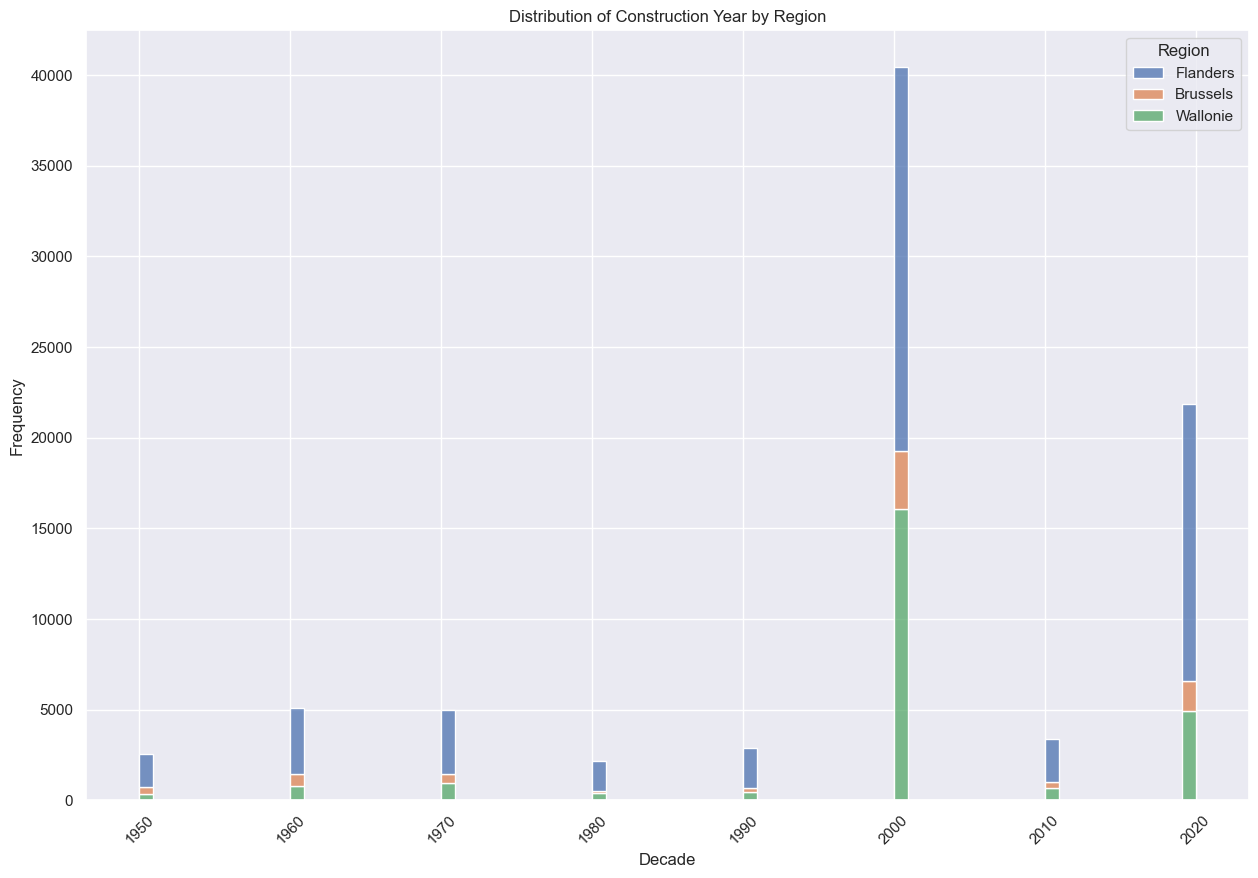

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('df_cleaned_sale.csv')


df_price_contruct_year = df[(df['ConstructionYear'] > 1950) & (df['Price'] < 800000) & (df['Price'] > 10000)]


df_price_contruct_year['Decade'] = (df_price_contruct_year['ConstructionYear'] // 10) * 10


plt.figure(figsize=(15, 10))
sns.histplot(df_price_contruct_year, x='Decade', hue='Region', kde=False,  multiple='stack')
plt.title('Distribution of Construction Year by Region')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Lets analyze some correlations with the price

- year of construction
- region
- type of property
- room count
- state of building


Median Price by Construction Decade

C:\Users\pieta\AppData\Local\Temp\ipykernel_18928\3419542623.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_agg, x='Decade', y='Price',  palette='Blues_d')


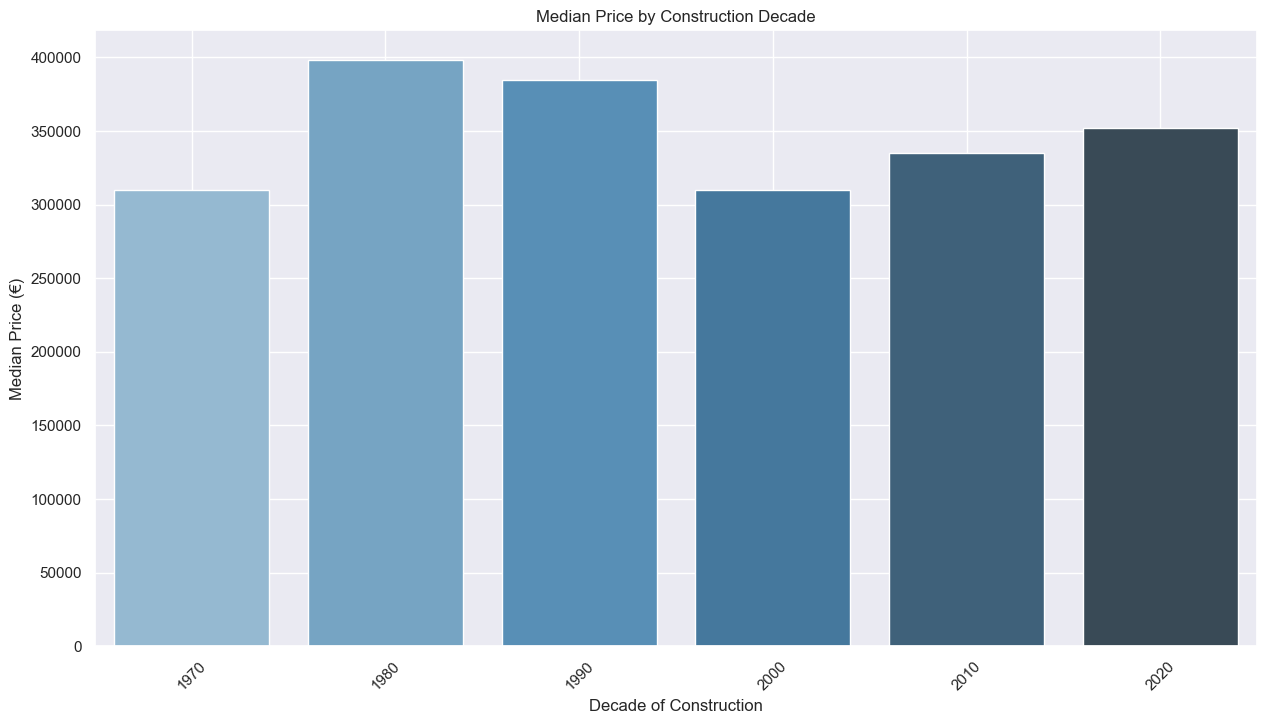

Correlation between Price and ConstructionYear:
                      Price  ConstructionYear
Price             1.000000          0.001833
ConstructionYear  0.001833          1.000000


In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('df_cleaned_sale.csv')


df_filtered = df[(df['ConstructionYear'] > 1970) & (df['Price'] > 10000)].copy()


df_filtered['Decade'] = (df_filtered['ConstructionYear'] // 10) * 10


data_agg = df_filtered.groupby('Decade')['Price'].median().reset_index()


plt.figure(figsize=(15, 8))
sns.barplot(data=data_agg, x='Decade', y='Price',  palette='Blues_d')
plt.title('Median Price by Construction Decade')
plt.xlabel('Decade of Construction')
plt.ylabel('Median Price (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




correlation = df[['Price', 'ConstructionYear']].corr()
print("Correlation between Price and ConstructionYear:\n", correlation)




#grouper années faire un new df avec ces colonnes price et construction year goupby et aggrégations



Relationship between Median Price and Region

C:\Users\pieta\AppData\Local\Temp\ipykernel_18928\3175278943.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_price_region, x='Region', y='Price', palette='Blues_d')


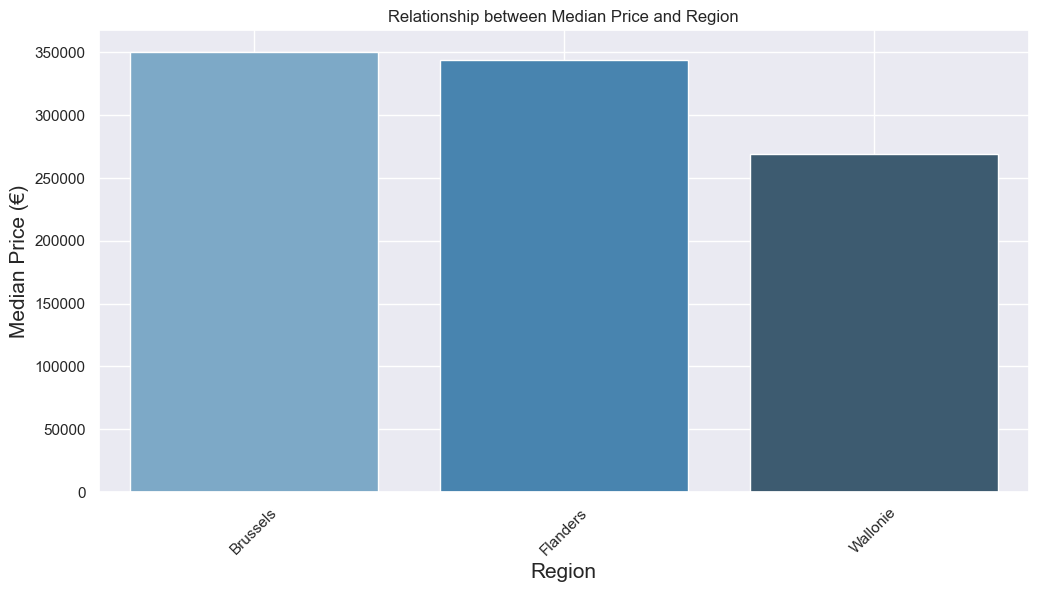

,Price,Region_encoded
Price,1.000000,-0.116282
Region_encoded,-0.116282,1.000000


In [9]:

df_filtered = df[(df['Price'] < 800000) &
                 (df['Price'] > 10000) &
                 (df['Price'] != 0)]

df_price_region = df_filtered.groupby('Region')['Price'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_price_region, x='Region', y='Price', palette='Blues_d')
plt.title('Relationship between Median Price and Region')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Median Price (€)', fontsize=15)
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()





df = pd.read_csv('DF_cleaned.csv')


property_map = {
    1: 'Brussel',
    2: 'Flanders',
    3: 'Wallonie'
}


df['Region'] = df['Region'].replace(property_map)


le = LabelEncoder()
df['Region_encoded'] = le.fit_transform(df['Region'])


df[['Price', 'Region_encoded']].corr()

#subtype df avec groupby et mean 
#label encoding for dealing with catégorical variables



Relationship between Price and Provinces

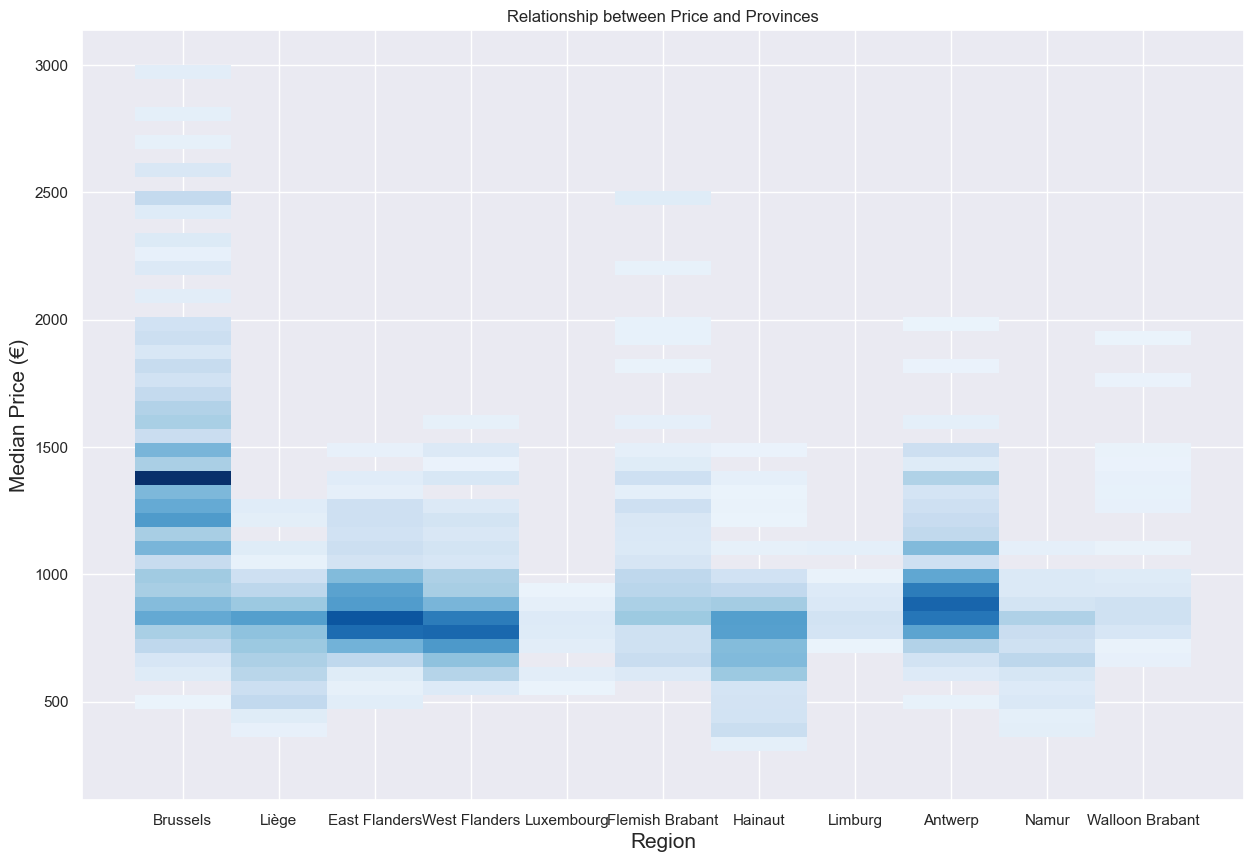

In [10]:
df = pd.read_csv('df_cleaned_rent.csv')

df_price_filtered = df[(df['ConstructionYear'] > 1950) & 
                       (df['Price'] < 3000) & 

                       (df['Price'] != 0)]

df_price_provinces = df_filtered.groupby('Province')['Price'].median().reset_index()

plt.figure(figsize=(15, 10))
sns.histplot(data=df_price_filtered,x='Province', y='Price', bins=50, pthresh=0.1, cmap='Blues')
plt.title('Relationship between Price and Provinces')
plt.xlabel('Region',fontsize=15)
plt.ylabel('Median Price (€)', fontsize=15)
plt.show()

Distribution of Price by Type of Property

C:\Users\pieta\AppData\Local\Temp\ipykernel_18928\19318431.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_filtered['TypeOfProperty'] = df_price_filtered['TypeOfProperty'].replace(property_map)
C:\Users\pieta\AppData\Local\Temp\ipykernel_18928\19318431.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df_price_filtered, x='TypeOfProperty', y='Price',palette='Blues_d')


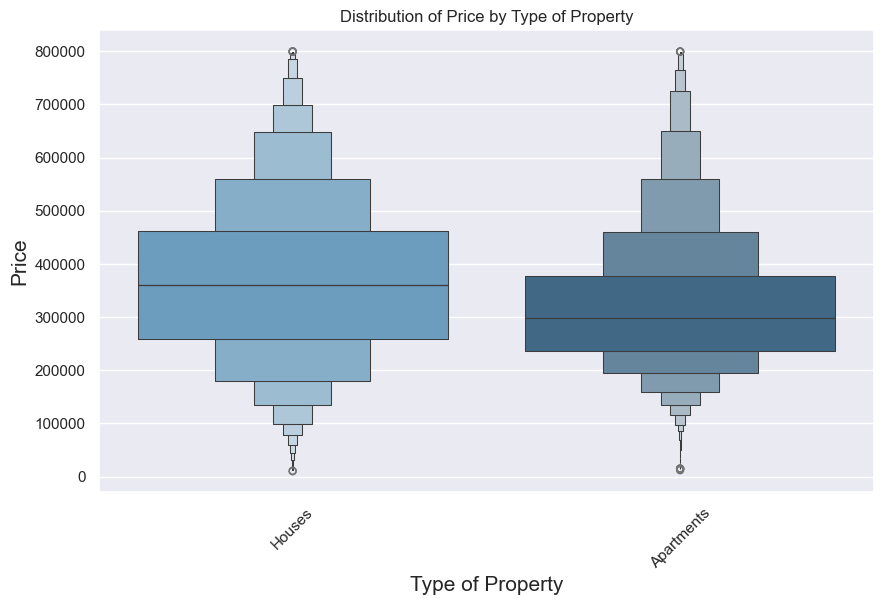

,Price,TypeOfProperty
Price,1.000000,-0.233049
TypeOfProperty,-0.233049,1.000000


In [11]:

df = pd.read_csv('DF_cleaned.csv')


df_price_filtered = df[(df['ConstructionYear'] > 1970) & 
                       (df['Price'] < 800000) & 
                       (df['Price'] > 10000)]


property_map = {1: 'Houses', 2: 'Apartments'}


df_price_filtered['TypeOfProperty'] = df_price_filtered['TypeOfProperty'].replace(property_map)
sns.color_palette()
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_price_filtered, x='TypeOfProperty', y='Price',palette='Blues_d')
plt.title('Distribution of Price by Type of Property')
plt.xlabel('Type of Property', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(rotation=45)
plt.show()


df[['Price', 'TypeOfProperty']].corr(method='spearman')






Relationship between Price and Subtype of Property

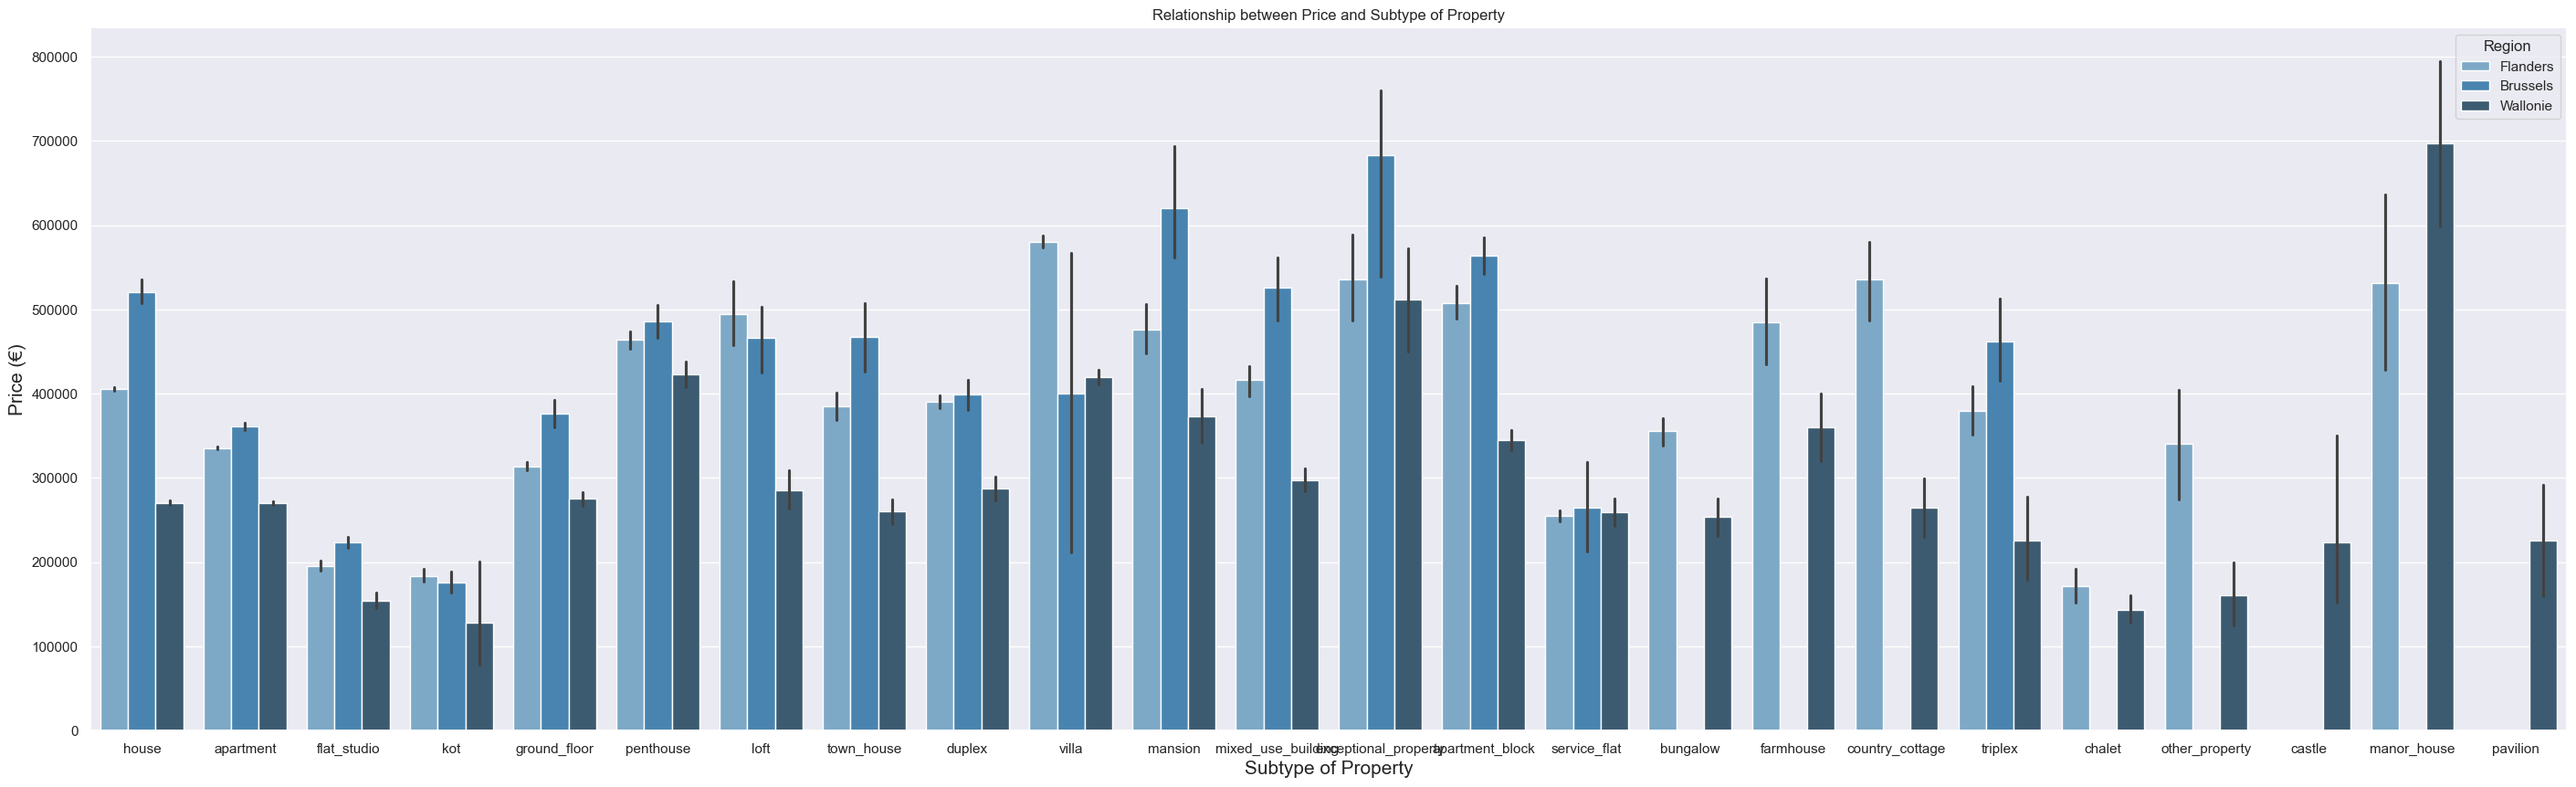

In [12]:
df = pd.read_csv('DF_cleaned.csv')


df_price_filtered = df[(df['ConstructionYear'] > 1970) & 
                       (df['Price'] < 800000) & 
                       (df['Price'] > 10000) & 
                       (df['Price'] != 0)]


sns.color_palette()
plt.figure(figsize=(35, 10))
sns.barplot(data=df_price_filtered, x='SubtypeOfProperty', y='Price',hue= 'Region',palette='Blues_d')
plt.title('Relationship between Price and Subtype of Property')
plt.xlabel('Subtype of Property', fontsize=15)
plt.ylabel('Price (€)', fontsize=15)
plt.show()


#df[['Price', 'SubtypeOfProperty']].corr(method='spearman')

In [13]:
# SurfaceOfPlot histogram 
'''import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_sales = pd.read_csv('df_cleaned_sale.csv')


df_sales

plt.figure(figsize=(10, 6))
plt.hist(df_sales['SurfaceOfPlot'], bins=30, color='firebrick', edgecolor='black')
plt.xlabel('Surface of Plot')
plt.xlim(right=3000)
plt.ylabel('Number of Properties')
plt.title('Number of Properties According to Their Surface')
plt.grid(True)
plt.show()'''

"import seaborn as sns\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\ndf_sales = pd.read_csv('df_cleaned_sale.csv')\n\n\ndf_sales\n\nplt.figure(figsize=(10, 6))\nplt.hist(df_sales['SurfaceOfPlot'], bins=30, color='firebrick', edgecolor='black')\nplt.xlabel('Surface of Plot')\nplt.xlim(right=3000)\nplt.ylabel('Number of Properties')\nplt.title('Number of Properties According to Their Surface')\nplt.grid(True)\nplt.show()"

Relationship between Price and Living Area

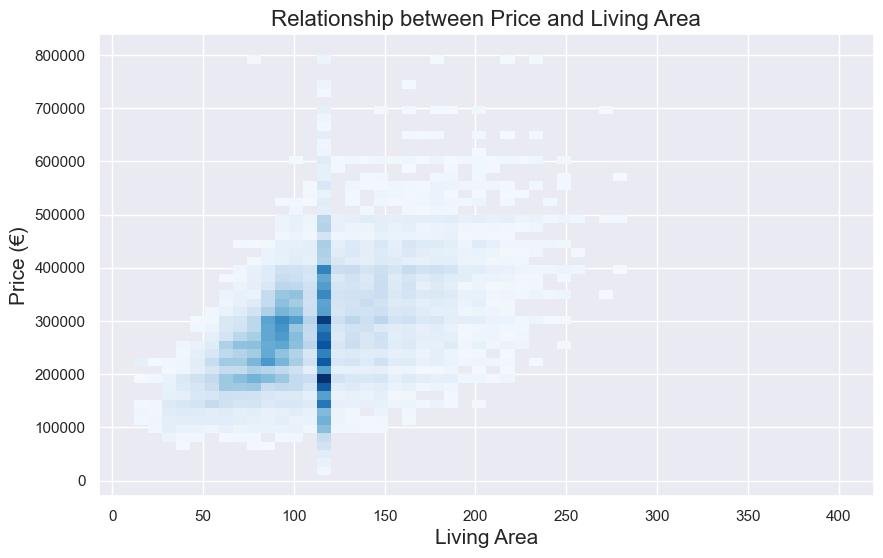

,Price,LivingArea
Price,1.000000,0.293646
LivingArea,0.293646,1.000000


In [14]:

df = pd.read_csv('DF_price_living.area.csv')


df_price_filtered = df[
                       (df['Price'] < 800000) &
                       (df['Price'] > 10000) &
                       (df['Price'] != 0)]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_price_filtered, x='LivingArea', y='Price', bins=50, pthresh=0.1, cmap='Blues')
plt.title('Relationship between Price and Living Area', fontsize=16)
plt.xlabel('Living Area', fontsize=15)
plt.ylabel('Price (€)', fontsize=15)
plt.show()

df[['Price', 'LivingArea']].corr()


Relationship between Price and State of Building

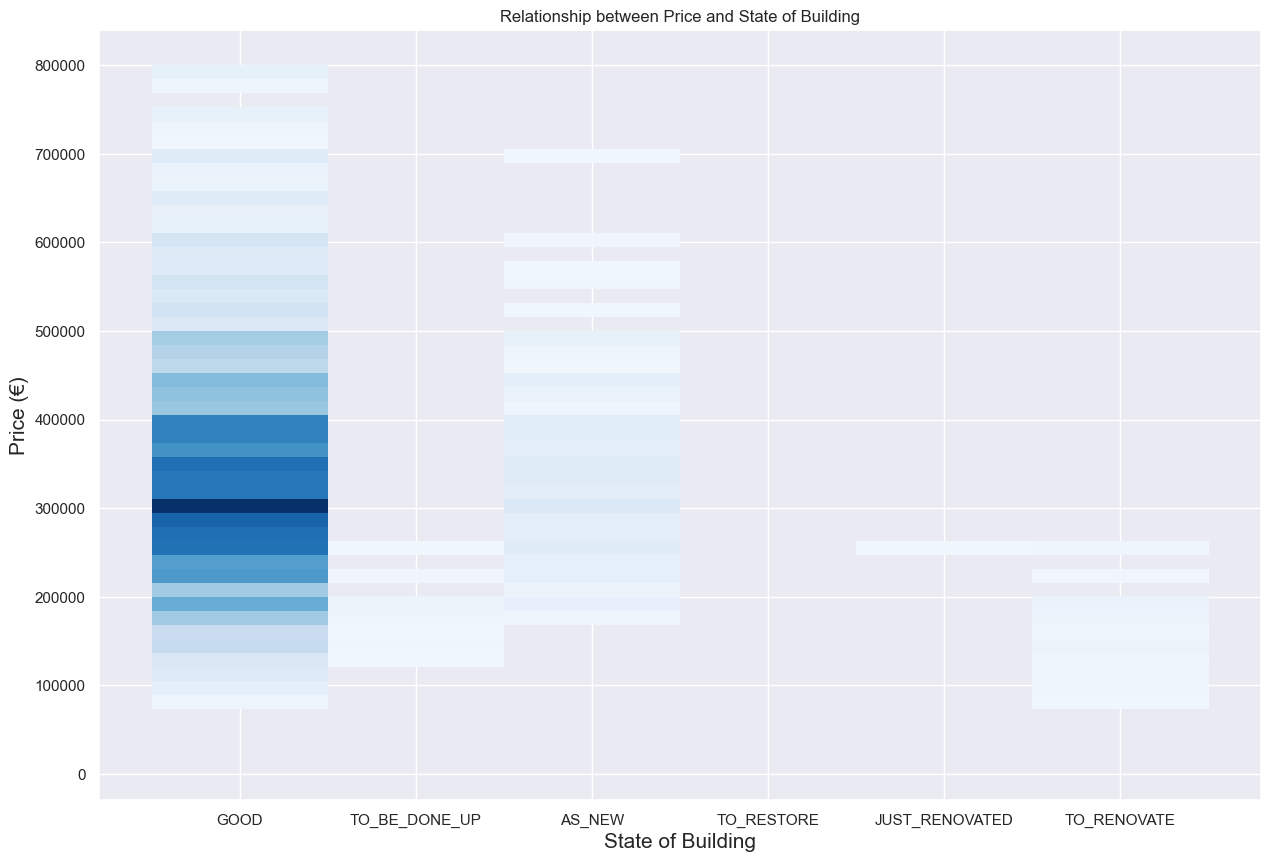

In [15]:

df = pd.read_csv('DF_cleaned.csv')

df_price_filtered = df[(df['ConstructionYear'] > 1970) & 
                       (df['Price'] < 800000) & 
                       (df['Price'] > 10000) & 
                       (df['Price'] != 0)]

plt.figure(figsize=(15, 10))
sns.histplot(data=df_price_filtered,x='StateOfBuilding', y='Price', bins=50, pthresh=0.1, cmap='Blues')
plt.title('Relationship between Price and State of Building')
plt.xlabel('State of Building',fontsize=15)
plt.ylabel('Price (€)', fontsize=15)
plt.show()


In [16]:

df = pd.read_csv('DF_cleaned.csv')


property_map = {
    1: 'GOOD',
    2: 'TO_BE_DONE_UP',
    3: 'AS_NEW',
    4: 'TO_RESTORE',
    5: 'JUST_RENOVATED',
    6: 'TO_RENOVATE'
}


df['TypeOfProperty'] = df['TypeOfProperty'].replace(property_map)


le = LabelEncoder()
df['StateOfBuilding_encoded'] = le.fit_transform(df['StateOfBuilding'])


correlation = df[['Price', 'StateOfBuilding_encoded']].corr(method='spearman')

print("Correlation between Price and StateOfBuilding (encoded):")
print(correlation)




Correlation between Price and StateOfBuilding (encoded):
                            Price  StateOfBuilding_encoded
Price                    1.000000                -0.091252
StateOfBuilding_encoded -0.091252                 1.000000


Final heatmap for general correlations

Correlation between quantitavies variables

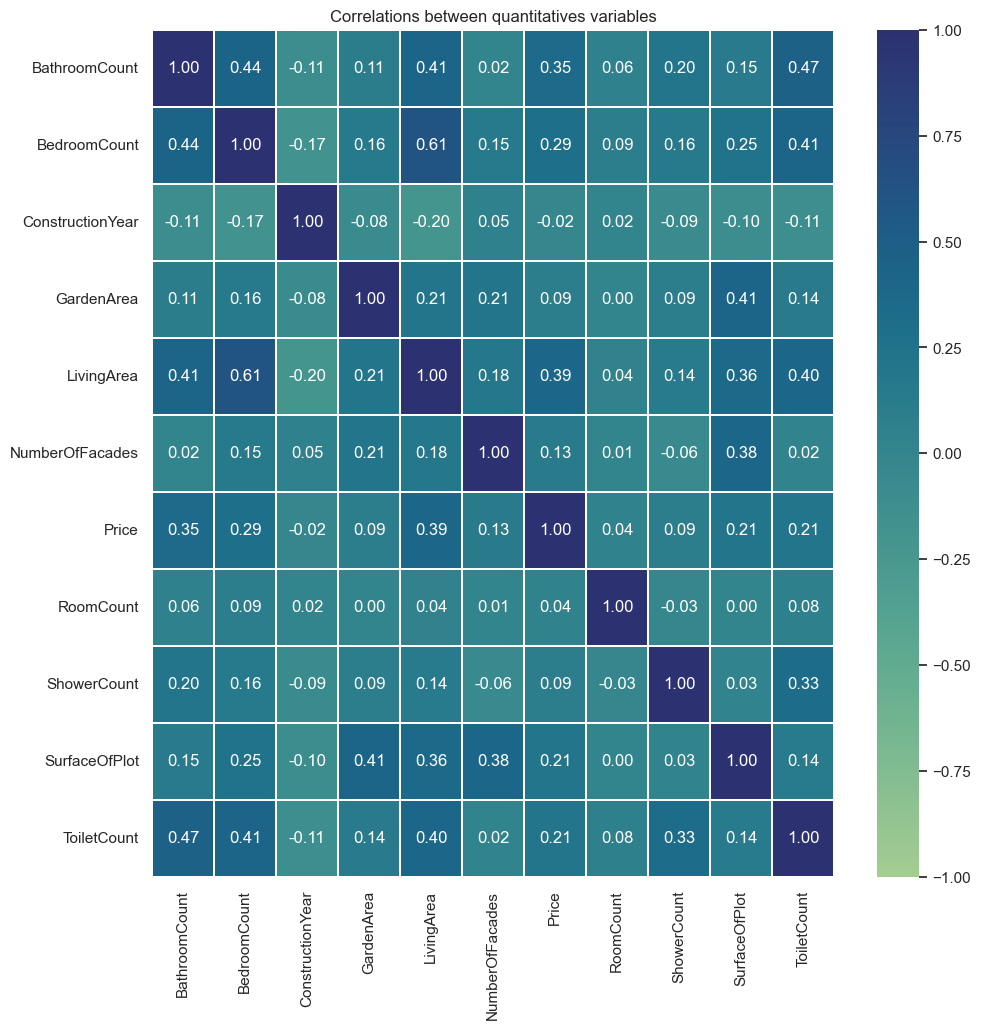

In [17]:
quantitative_columns = [
    'BathroomCount', 'BedroomCount', 'ConstructionYear', 'GardenArea',
    'LivingArea', 'NumberOfFacades', 'Price', 'RoomCount',
    'ShowerCount', 'SurfaceOfPlot', 'ToiletCount'
]

df_quantitative = df[quantitative_columns]

corr_matrix = df_quantitative.corr(method='pearson')


fig, ax = plt.subplots(figsize=(11, 11))
heatmap_plot = sns.heatmap(corr_matrix, ax=ax, annot=True, linewidths=0.05, fmt='.2f', cmap="crest", vmin=-1, vmax=1, center=0)
plt.title("Correlations between quantitatives variables")
plt.show()

Correlation between qualitative variables

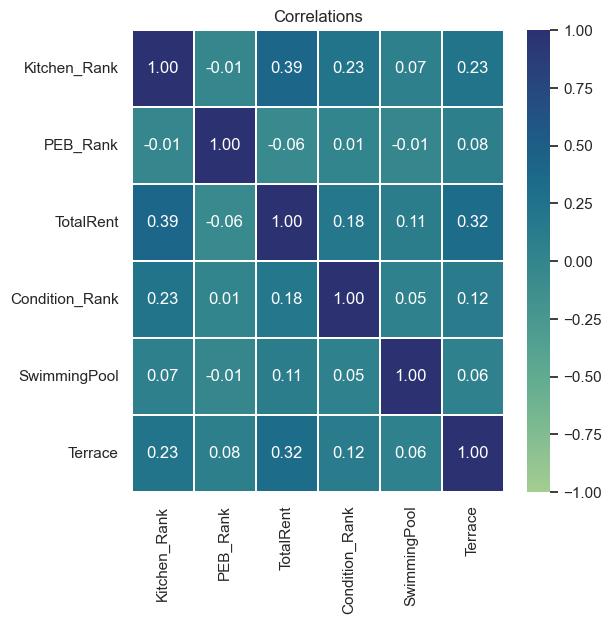

In [18]:
df = pd.read_csv('df_cleaned_rent.csv')
df.describe()
df["TotalRent"] = df["Price"] + df['MonthlyCharges']
qualitative_columns = [
    'Kitchen_Rank', 'PEB_Rank', 'TotalRent', 'Condition_Rank',
    'SwimmingPool', 'Terrace'
]

df_qualitative = df[qualitative_columns]

# Corr Matrix
corr_matrix = df_qualitative.corr(method='spearman')

# Visualize
fig, ax = plt.subplots(figsize=(6, 6))
heatmap_plot = sns.heatmap(corr_matrix, ax=ax, annot=True, linewidths=0.05, fmt='.2f', cmap='crest', vmin=-1, vmax=1, center=0)
plt.title("Correlations")
plt.show()